In [1]:
from typing import override
from pprint import pprint
import matplotlib.pyplot as plt

from systrade.broker import (
    BacktestBroker,
    BarData,
    ExecutionReport
)
from systrade.engine import Engine
from systrade.feed import FileFeed
from systrade.strategy import Strategy

In [2]:
class MomentumStrategy(Strategy):
    """A long only momentum strategy which will buy all you can afford if:

        1. Current closing price > yesterday's closing price > 2 days ago's closing price
        2. Is not currently invested in the security

       and  will close the position if:

        1. Current closing price < yesterday's closing price < 2 days ago's closing price
        2. Is currently invested in the security

    """

    def __init__(self, symbol: str) -> None:
        super().__init__()
        self.symbol = symbol
        self.previous_prices  = [-1., -1.] #-1 represents a lack of data
    
    @override
    def on_start(self) -> None:
        # To get data chugging through `on_data` we need to subscribe to the
        # symbols we're interested in
        self.subscribe(self.symbol)
        
    @override
    def on_data(self, data: BarData) -> None:
        current_price = data[self.symbol].close
        if(-1 in self.previous_prices):
            self.previous_prices[0] = self.previous_prices[-1]
            self.previous_prices[-1] = current_price
            pass
        
        if not self.portfolio.is_invested_in(self.symbol):
            if(current_price > self.previous_prices[-1] and self.previous_prices[-1] > self.previous_prices[0]):
                quantity = self.portfolio.cash() / current_price #Amount to buy
                self.post_market_order(self.symbol, quantity)
                
        if self.portfolio.is_invested_in(self.symbol):
            if(current_price < self.previous_prices[-1] and self.previous_prices[-1] < self.previous_prices[0]):
                quantity = self.portfolio.position(self.symbol).qty #Amount to Sell
                self.post_market_order(self.symbol, -quantity)
                
        self.previous_prices[0] = self.previous_prices[-1]
        self.previous_prices[-1] = current_price
        
    @override
    def on_execution(self, report: ExecutionReport) -> None:
        pass
        

In [3]:
cash = 1000
feed = FileFeed("/Users/232724/Documents/financial_modeling/systrade/example/history.csv", start="2018-01-01", end="2018-02-01")
broker = BacktestBroker()
strategy = MomentumStrategy("NVDA")
engine = Engine(feed, broker, strategy, cash)
engine.run()



/Users/232724/Documents/financial_modeling/systrade/src/systrade/feed.py:53: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  self.path["Date"] = pd.to_datetime(self.path["Date"])


Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran
Ran


In [6]:
activity = engine.portfolio.activity()
activity.total_return()

np.float64(6.785269081333275)

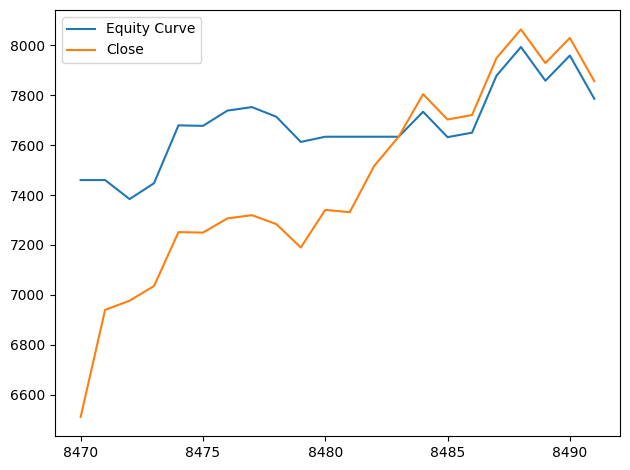

In [7]:
activity = engine.portfolio.activity()
close = feed.df.loc[feed.df["Symbol"] == "NVDA"]["Close"]
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(close.index, activity.equity_curve()[-22:], label="Equity Curve")
ax.plot(close.index, close * engine.portfolio.position("NVDA").qty, label="Close")
ax.legend()
fig.tight_layout()